In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv("/content/creditcard.csv")

# Check for missing values
print(df.isnull().sum())

# Separate features (X) and target variable (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Time      0
V1        0
V2        0
V3        1
V4        1
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
# Check for missing values in the target variable
print(y_train.isnull().sum())

# If there are missing values, fill them with a suitable strategy
y_train.fillna(y_train.mode()[0], inplace=True)  # Filling with the mode for simplicity

# Verify that there are no missing values in the target variable
print(y_train.isnull().sum())


1
0


In [ ]:
# Apply oversampling to address class imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


In [ ]:
# Explore class distribution
print(y_train.value_counts())

# Apply oversampling to address class imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)


0.0    7943
1.0      29
Name: Class, dtype: int64


In [ ]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


In [ ]:
from sklearn.impute import SimpleImputer

# Create an imputer and fit it on the training data
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)

# Verify that there are no missing values after imputation
print(pd.DataFrame(X_train_scaled_imputed).isnull().sum())


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64


In [ ]:
# Create and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled_imputed, y_train_resampled)


RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1984    0]
 [   2    7]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



In [ ]:
# Create an imputer and fit it on the training data
imputer = SimpleImputer(strategy='mean')
X_train_scaled_imputed = imputer.fit_transform(X_train_scaled)
X_test_scaled_imputed = imputer.transform(X_test_scaled)

# Verify that there are no missing values after imputation in both training and testing data
print(pd.DataFrame(X_train_scaled_imputed).isnull().sum())
print(pd.DataFrame(X_test_scaled_imputed).isnull().sum())

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64


In [ ]:
# Create and train the model
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train_scaled_imputed, y_train_resampled)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled_imputed)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1984
         1.0       1.00      0.78      0.88         9

    accuracy                           1.00      1993
   macro avg       1.00      0.89      0.94      1993
weighted avg       1.00      1.00      1.00      1993



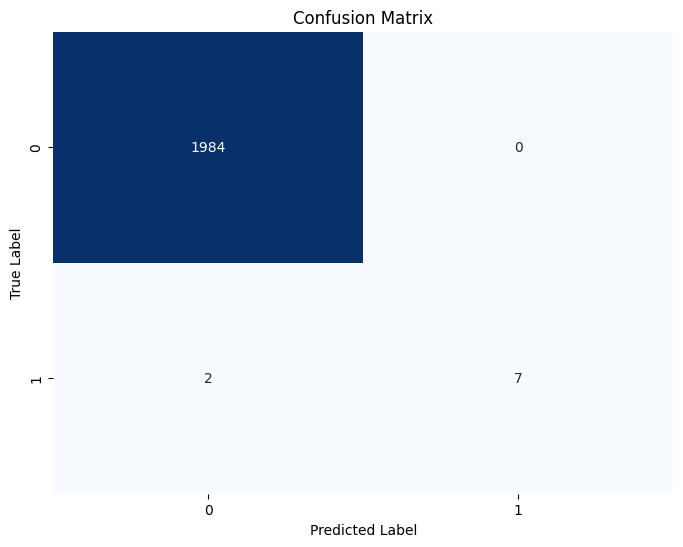

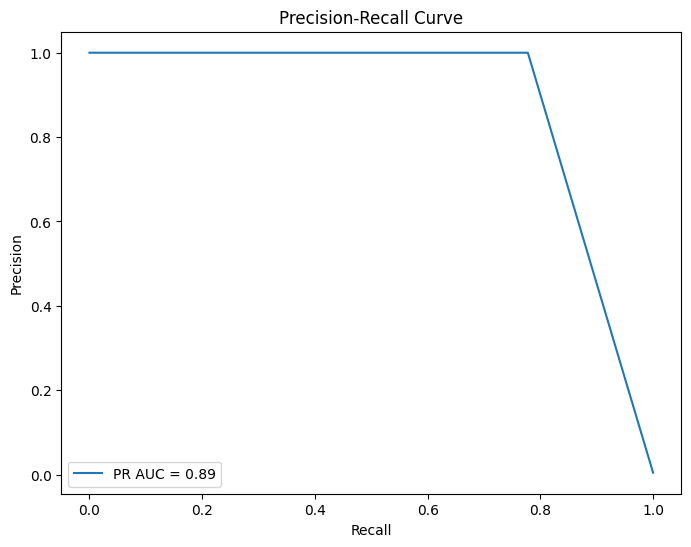

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()
